### LIBRARIES :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

### READ THE DATASET :

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';', quotechar='"')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Features
For the rest of the homework, you'll need to use only these columns:
age,job,marital,education,balance,housing,contact,day,month,duration,campaign,
pdays,previous,poutcome,y

In [4]:
columns_to_drop = ['default', 'loan']
df = df.drop(columns=columns_to_drop)
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


### Data preparation
•	Select only the features from above.

•	Check if the missing values are presented in the features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(45211, 15)

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [11]:
df.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [12]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Question 1
What is the most frequent observation (mode) for the column education?

unknown

primary

secondary

tertiary

In [13]:
education_mode = df['education'].mode()[0]
print(f"Most frequent observation (mode) for education: {education_mode}")

Most frequent observation (mode) for education: secondary


### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.
What are the two features that have the biggest correlation?

age and balance

day and campaign

day and pdays

pdays and previous

In [14]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

correlation_matrix_unstacked = correlation_matrix.unstack().sort_values(ascending=False)
highest_correlation = correlation_matrix_unstacked[(correlation_matrix_unstacked != 1)].idxmax()
print(f"Two features with the biggest correlation: {highest_correlation}")

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000
Two features with the biggest correlation: ('previous', 'pdays')


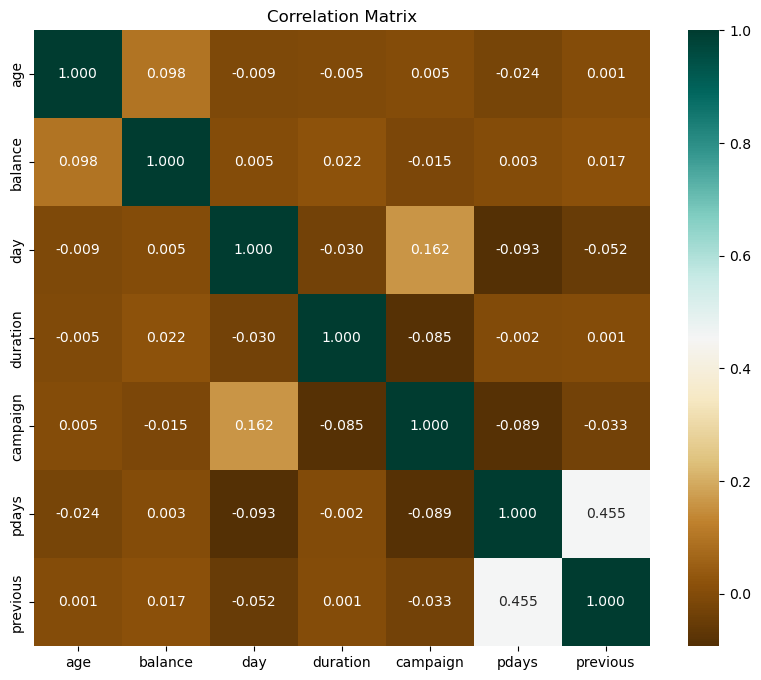

Two features with the biggest correlation: ('previous', 'pdays')


In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="BrBG", annot=True, fmt=".3f", square=True)
plt.title('Correlation Matrix')
plt.show()
print(f"Two features with the biggest correlation: {highest_correlation}")

### Target encoding
Now we want to encode the y variable.

Let's replace the values yes/no with 1/0.


In [16]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [17]:
print(df['y'])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


### Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

Make sure that the target value y is not in your dataframe.

In [18]:
seed = 42
d_test = 0.2
d_val = 0.2

df_full_train, df_test = train_test_split(df.drop(columns="y"), test_size=d_test, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=d_val, random_state=seed)

print(f'Shape of full training set: {df_full_train.shape}')
print(f'Shape of validation set: {df_val.shape}')
print(f'Shape of test set: {df_test.shape}')

Shape of full training set: (36168, 14)
Shape of validation set: (7234, 14)
Shape of test set: (9043, 14)


### Question 3
Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.

Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

contact

education

housing

poutcome

In [19]:
import pandas as pd
from sklearn.metrics import mutual_info_score

labels = df.y[df_train.index]

features_of_interest = ['contact', 'education', 'housing', 'poutcome']

categorical = df_train[features_of_interest].select_dtypes(exclude="number").columns.to_list()

mi_scores = df_train[categorical].apply(lambda series: mutual_info_score(series, labels))

mi_scores_sorted = mi_scores.sort_values(ascending=False)

print(mi_scores_sorted.round(2))

highest_score_variable = mi_scores_sorted.idxmax()
highest_score_value = mi_scores_sorted.max()

print(f"The variable with the biggest mutual information score is '{highest_score_variable}' with a score of {highest_score_value:.2f}.")

poutcome     0.03
contact      0.01
housing      0.01
education    0.00
dtype: float64
The variable with the biggest mutual information score is 'poutcome' with a score of 0.03.


### Question 4
Now let's train a logistic regression.

Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

0.6

0.7

0.8

0.9

In [20]:
from sklearn.feature_extraction import DictVectorizer

numerical = df_train.select_dtypes(include="number").columns.to_list()
categorical = df_train.select_dtypes(exclude="number").columns.to_list()
features = categorical + numerical

train_dict = df_train[features].to_dict(orient="records")
val_dict = df_val[features].to_dict(orient="records")
test_dict = df_test[features].to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(X=train_dict)
X_val = dv.transform(X=val_dict)
X_test = dv.transform(X=test_dict)

y_train = df.y[df_train.index].to_numpy()
y_val = df.y[df_val.index].to_numpy()
y_test = df.y[df_test.index].to_numpy()

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {round(accuracy, 2)}')

Validation Accuracy: 0.9


### Question 5
Let's find the least useful feature using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

age

balance

marital

previous

Note: The difference doesn't have to be positive.

In [22]:
from tabulate import tabulate

features_of_interest = ['age', 'balance', 'marital', 'previous']

results = []

accuracy_differences = {}

for feature in features_of_interest:
    features_excluded = [f for f in features_of_interest if f != feature]
    
    train_dict_excluded = df_train[features_excluded].to_dict(orient="records")
    val_dict_excluded = df_val[features_excluded].to_dict(orient="records")

    X_train_excluded = dv.fit_transform(X=train_dict_excluded)
    X_val_excluded = dv.transform(X=val_dict_excluded)
    
    model.fit(X_train_excluded, y_train)
    y_val_pred_excluded = model.predict(X_val_excluded)
    
    accuracy_excluded = accuracy_score(y_val, y_val_pred_excluded)
    
    accuracy_difference = accuracy - accuracy_excluded
    accuracy_differences[feature] = accuracy_difference
    
    results.append([feature, round(accuracy, 4), round(accuracy_excluded, 4), round(accuracy_difference, 4)])

results_df = pd.DataFrame(results, columns=["Feature", "Accuracy With Feature", "Accuracy Without Feature", "Accuracy Difference"])

print("\nAccuracy Results:")
print(tabulate(results_df, headers='keys', tablefmt='pretty', floatfmt=".4f"))

least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)
smallest_difference_value = accuracy_differences[least_useful_feature]

print(f'\nThe least useful feature is "{least_useful_feature}" with a difference of {smallest_difference_value:.4f}.')


Accuracy Results:
+---+----------+-----------------------+--------------------------+---------------------+
|   | Feature  | Accuracy With Feature | Accuracy Without Feature | Accuracy Difference |
+---+----------+-----------------------+--------------------------+---------------------+
| 0 |   age    |        0.9016         |          0.8806          |        0.021        |
| 1 | balance  |        0.9016         |          0.8807          |       0.0209        |
| 2 | marital  |        0.9016         |          0.8807          |       0.0209        |
| 3 | previous |        0.9016         |          0.8821          |       0.0195        |
+---+----------+-----------------------+--------------------------+---------------------+

The least useful feature is "previous" with a difference of 0.0195.


### Question 6
Now let's train a regularized logistic regression.

Let's try the following values of the parameter C: [0, 0.01, 0.1, 1, 10].

Train models using all the features as in Q4.

Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

0.01

0.1

1

10

100

Note: If there are multiple options, select the smallest C.

In [23]:
C_values = [0.01, 0.1, 1, 10, 100]
best_accuracy = 0
best_C = None

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=seed)
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    rounded_accuracy = round(accuracy, 3)
    
    print(f'Accuracy with C={C}: {rounded_accuracy}')
    
    if rounded_accuracy > best_accuracy or (rounded_accuracy == best_accuracy and (best_C is None or C < best_C)):
        best_accuracy = rounded_accuracy
        best_C = C

print(f'The best C value is {best_C} with an accuracy of {best_accuracy:.3f}.')

Accuracy with C=0.01: 0.899
Accuracy with C=0.1: 0.902
Accuracy with C=1: 0.902
Accuracy with C=10: 0.901
Accuracy with C=100: 0.902
The best C value is 0.1 with an accuracy of 0.902.


### SUMMARY

In [24]:
from prettytable import PrettyTable

# Initialize PrettyTable
table = PrettyTable()

# Define the columns for the table
table.field_names = ["Question", "Task", "Answer"]

# Add rows to the table
table.add_row([
    "1. Education Mode",
    "Most frequent observation (mode) for the `education` column.",
    "Secondary"
])

table.add_row([
    "2. Correlation",
    "Two features with the highest correlation in the dataset's numerical features.",
    "Pdays & Previous"
])

table.add_row([
    "3. Mutual Information",
    "Variables with the biggest mutual information score.",
    "Poutcome with a score of: 0.03"
])

table.add_row([
    "4. Logistic Regression Accuracy",
    "Accuracy on the validation dataset.",
    "Validation accuracy: 0.9"
])

table.add_row([
    "5. Feature Elimination",
    "Difference between the original accuracy and the accuracy without the feature.",
    "The least useful feature is previous with a difference of 0.0195."
])

table.add_row([
    "6. Regularized Logistic Regression",
    "(C) values with best validation accuracy.",
    "The best C value is 0.1 with an accuracy of 0.902."
])

table

Question,Task,Answer
1. Education Mode,Most frequent observation (mode) for the `education` column.,Secondary
2. Correlation,Two features with the highest correlation in the dataset's numerical features.,Pdays & Previous
3. Mutual Information,Variables with the biggest mutual information score.,Poutcome with a score of: 0.03
4. Logistic Regression Accuracy,Accuracy on the validation dataset.,Validation accuracy: 0.9
5. Feature Elimination,Difference between the original accuracy and the accuracy without the feature.,The least useful feature is previous with a difference of 0.0195.
6. Regularized Logistic Regression,(C) values with best validation accuracy.,The best C value is 0.1 with an accuracy of 0.902.
